## DNA Classification - Notebook 1

## Library Imports

In [6]:
# Data Manipulation.
import pandas as pd
import numpy as np 

# Data Visualization.
import matplotlib.pyplot as plt                     
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')           

## Loading the dataset

In [3]:
df = pd.read_csv('../data/synthetic_dna_dataset.csv')
print(f'Dataset loaded succesfully!')
print(f'The dataset contains {df.shape[0]} entries and {df.shape[1]} columns.')
print(f'Close look to the dataset\n')
df.head()

Dataset loaded succesfully!
The dataset contains 3000 entries and 13 columns.
Close look to the dataset



,Sample_ID,Sequence,GC_Content,AT_Content,Sequence_Length,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Mutation_Flag,Class_Label,Disease_Risk
0,SAMPLE_1,CTTTCGGGATACTTTTGGGATGGTCTTGGTCAAGGGTTTTAGCCCG...,50.0,50.0,100,22,28,19,31,0.986,0,Bacteria,High
1,SAMPLE_2,TTGACCAAATTTGATTGGAAGTGGTAAGCGCGTATTCCTAGCATCA...,45.0,55.0,100,27,28,22,23,0.486,1,Virus,Medium
2,SAMPLE_3,GCGTGAGTTCTAATTTAAAAAGTCGTAACACGTACCCCGGCGTGTA...,51.0,49.0,100,26,23,30,21,0.367,1,Bacteria,Low
3,SAMPLE_4,ACTACGCGGACAAGAACCAACAGAACCTGGTTTTCGCAAGGGAGTG...,55.0,45.0,100,28,17,23,32,0.404,0,Human,Medium
4,SAMPLE_5,TTCAATGCAGATTGAAAGTTACTTTCATCTGCCCTATGGGTCCCTT...,46.0,54.0,100,24,30,25,21,0.818,0,Human,High


## EDA & Data Preprocess

In [ ]:
# Looking for null values & data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample_ID        3000 non-null   object 
 1   Sequence         3000 non-null   object 
 2   GC_Content       3000 non-null   float64
 3   AT_Content       3000 non-null   float64
 4   Sequence_Length  3000 non-null   int64  
 5   Num_A            3000 non-null   int64  
 6   Num_T            3000 non-null   int64  
 7   Num_C            3000 non-null   int64  
 8   Num_G            3000 non-null   int64  
 9   kmer_3_freq      3000 non-null   float64
 10  Mutation_Flag    3000 non-null   int64  
 11  Class_Label      3000 non-null   object 
 12  Disease_Risk     3000 non-null   object 
dtypes: float64(3), int64(6), object(4)
memory usage: 304.8+ KB


There are no null values. Almost every feature is numerical, so i'm changing the important categorical columns to numerical. These columns are 'Class_Label' y 'Disease_Risk', which are the target column of the model.

In [7]:
# I will use LabelEncoder.
from sklearn.preprocessing import LabelEncoder

In [9]:
print(f'Encoding categorical target columns...')
# Selecting categorical cols.
categorical_cols = ['Class_Label','Disease_Risk']
label_encoders = {}
# Encoding.
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[f'{col}_encoded'] = le.fit_transform(df[col])
        label_encoders[col] = le
print(f'Categorical columns encoded succesfully!')

Encoding categorical target columns...
Categorical columns encoded succesfully!


Selecting numerical columns.

In [10]:
feature_cols = [col for col in df.columns if col not in ['Sample_ID', 'Sequence', 'Class_Label', 'Disease_Risk']]

Starting the EDA.

Performing Exploratory Data Analysis...


 Descriptive Stats:


,count,mean,std,min,25%,50%,75%,max
GC_Content,3000.0,50.120000,5.062688,34.0,47.00,50.000,53.00000,66.0
AT_Content,3000.0,49.880000,5.062688,34.0,47.00,50.000,53.00000,66.0
Sequence_Length,3000.0,100.000000,0.000000,100.0,100.00,100.000,100.00000,100.0
Num_A,3000.0,24.950667,4.317458,11.0,22.00,25.000,28.00000,40.0
Num_T,3000.0,24.929333,4.317702,9.0,22.00,25.000,28.00000,42.0
Num_C,3000.0,25.004000,4.349056,10.0,22.00,25.000,28.00000,42.0
Num_G,3000.0,25.116000,4.329603,12.0,22.00,25.000,28.00000,42.0
kmer_3_freq,3000.0,0.547738,0.258521,0.1,0.33,0.543,0.77225,1.0
Mutation_Flag,3000.0,0.496667,0.500072,0.0,0.00,0.000,1.00000,1.0
Class_Label_encoded,3000.0,1.490667,1.119374,0.0,0.00,1.000,2.00000,3.0


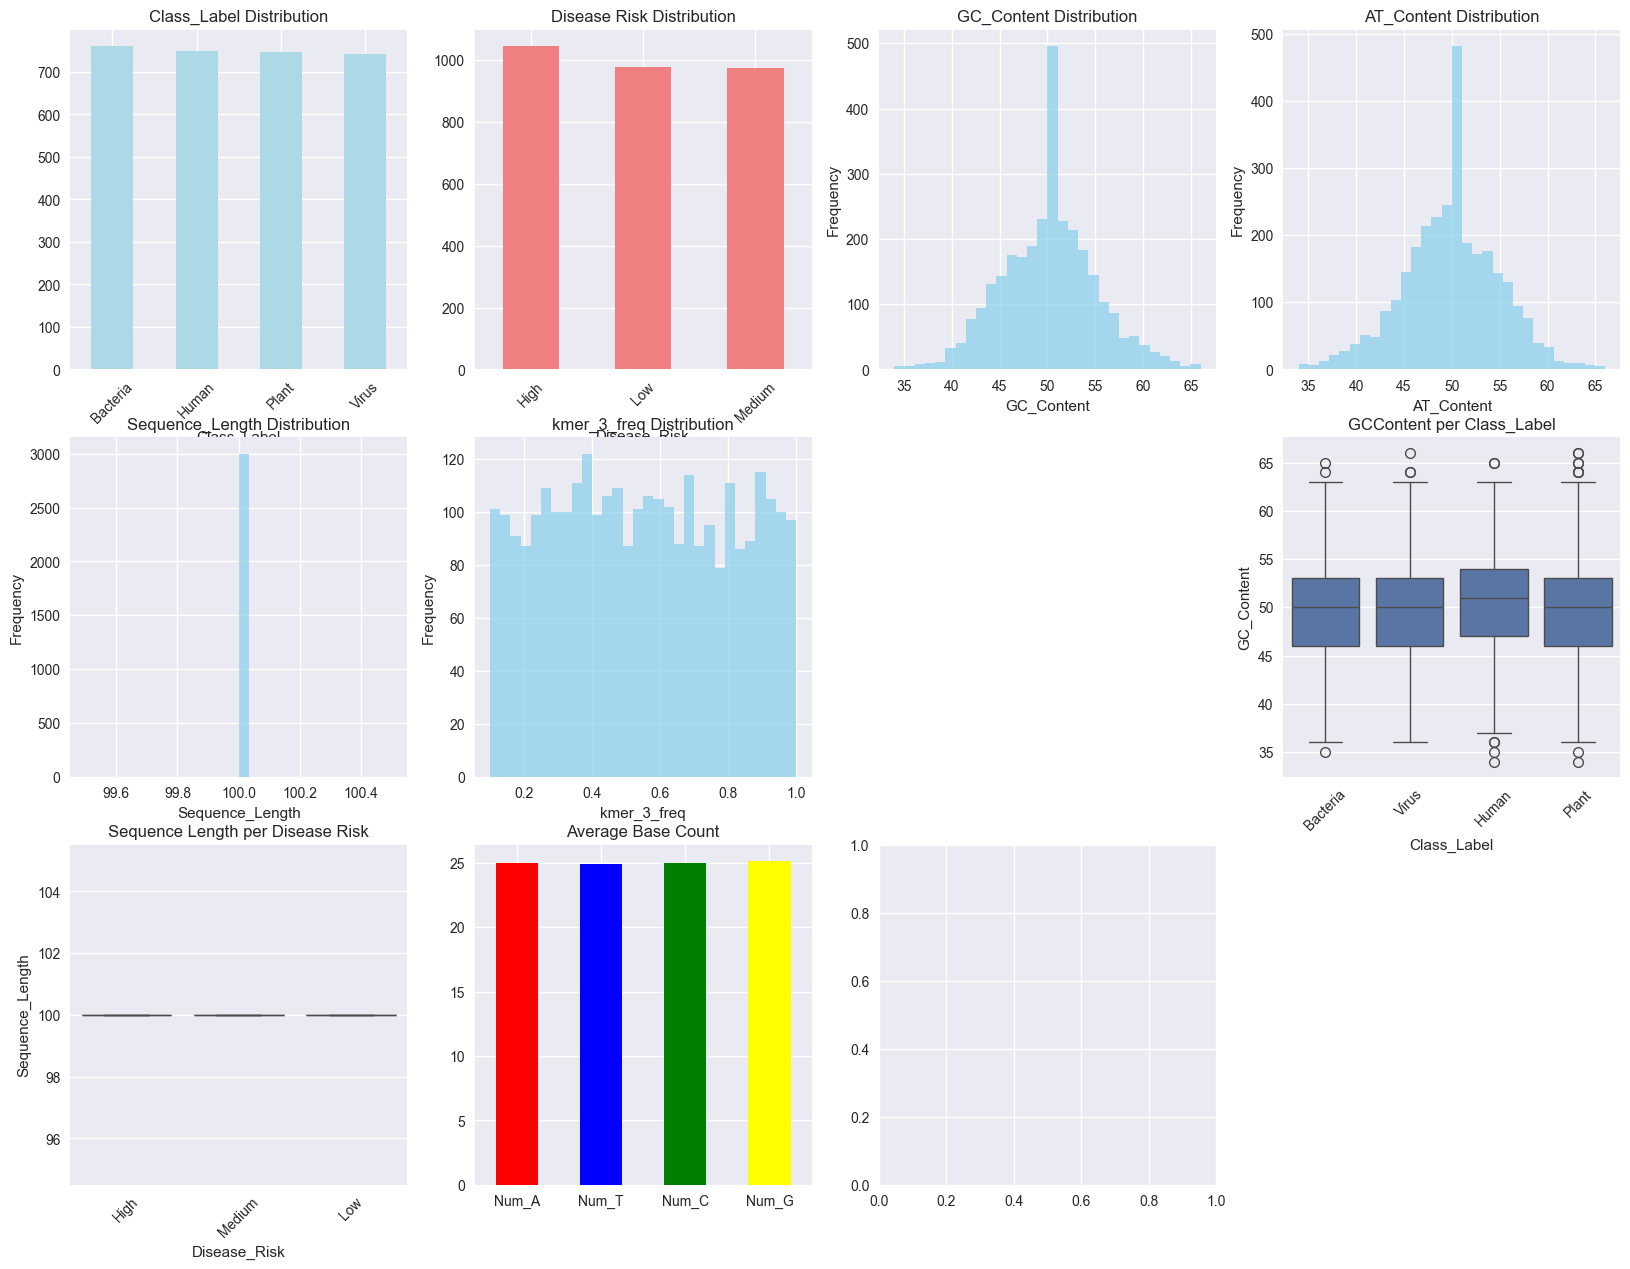

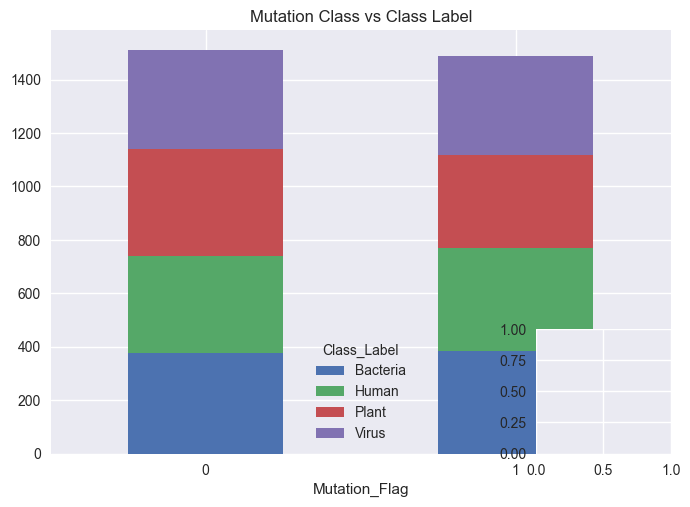

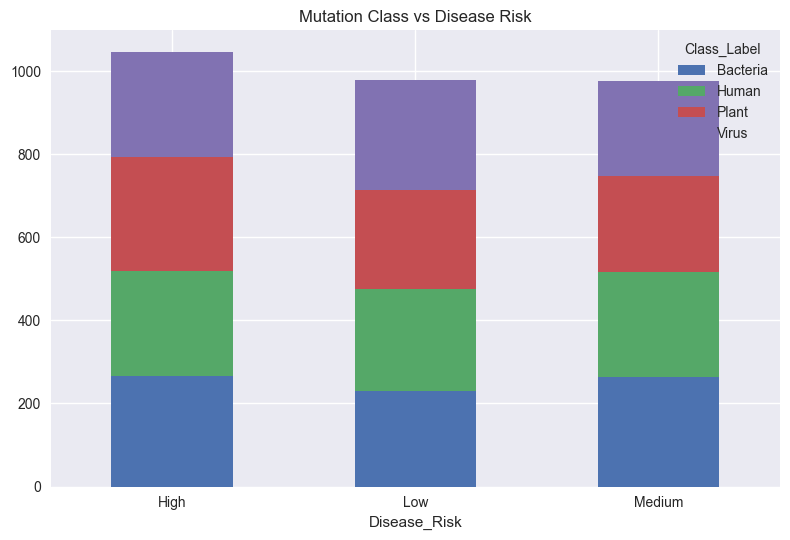

In [17]:
# Display settings.
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20,15))

print(f'Performing Exploratory Data Analysis...\n')

# 1.Target distribution.
    # First target.
plt.subplot(3,4,1)
df['Class_Label'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Class_Label Distribution')
plt.xticks(rotation=45)

    # Second target.
plt.subplot(3,4,2)
df['Disease_Risk'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Disease Risk Distribution')
plt.xticks(rotation=45)

# 2. Numerical features distribution.
numeric_features = ['GC_Content', 'AT_Content', 'Sequence_Length', 'kmer_3_freq']
for i, feature in enumerate(numeric_features, 3):
    plt.subplot(3,4,i)
    df[feature].hist(bins=30, alpha=0.7, color='skyblue')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
# 3. Correlation Matrix.
'''plt.subplot(3,4,7)
correlation_matrix = df[feature_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f', cbar_kws={'shrink':0.8})
plt.title('Correlation Matrix')'''

# 4. Class boxplots.
plt.subplot(3,4,8)
sns.boxplot(data=df, x='Class_Label', y='GC_Content')
plt.title('GCContent per Class_Label')
plt.xticks(rotation=45)

plt.subplot(3,4,9)
sns.boxplot(data=df, x='Disease_Risk', y='Sequence_Length')
plt.title('Sequence Length per Disease Risk')
plt.xticks(rotation=45)

# 5. Average bases count.
plt.subplot(3,4,10)
base_counts = df[['Num_A','Num_T','Num_C','Num_G']].mean()
base_counts.plot(kind='bar', color=['red','blue','green','yellow'])
plt.title('Average Base Count')
plt.xticks(rotation=0)

# 6. Mutation_Flag target relations.
plt.subplot(3,4,11)
mutation_class = pd.crosstab(df['Mutation_Flag'], df['Class_Label'])
mutation_class.plot(kind='bar', stacked=True)
plt.title('Mutation Class vs Class Label')
plt.xticks(rotation=0)

plt.subplot(3,4,12)
mutation_class = pd.crosstab(df['Disease_Risk'], df['Class_Label'])
mutation_class.plot(kind='bar', stacked=True)
plt.title('Mutation Class vs Disease Risk')
plt.xticks(rotation=0)

plt.tight_layout()
plt.plot()

# Displaying descriptive stats.
print(f'\n Descriptive Stats:')
df.describe().T

Text(0.5, 1.0, 'Correlation Matrix')

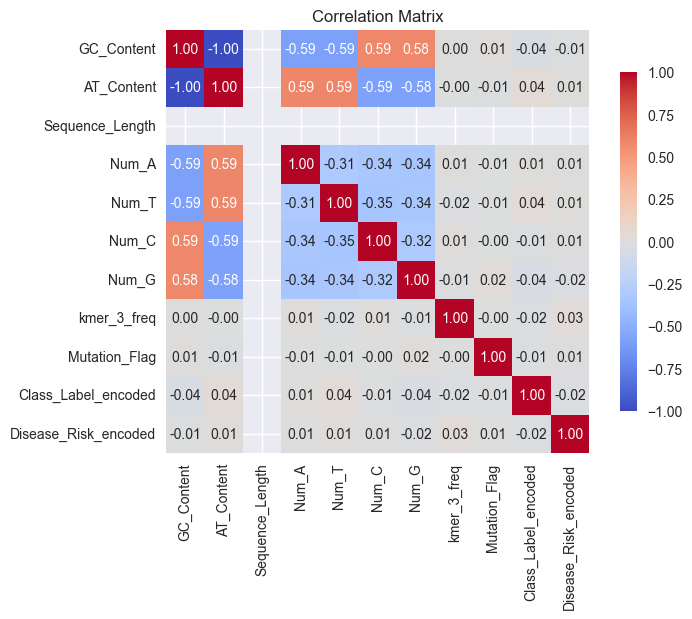

In [ ]:
# Correlation Matrix out of the subplots.
correlation_matrix = df[feature_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f', cbar_kws={'shrink':0.8})
plt.title('Correlation Matrix')

It's very noticeable that this is a synthetic dataset, as all the data is perfectly balanced and there are no errors. Every graphic displays that features are balanced. From the correlation matrix, we can take that Nums target are correlated between them, but any features has got impact on the targets. 

I'm continuing preparing the data for the model by scaling it.

## Data Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

print(f'Scaling data for the modeling...')
scaler = StandardScaler()
# Selecting features.
X = df[feature_cols]
y_class = df['Class_Label_encoded']
y_disease = df['Disease_Risk_encoded']

# Scaling X and displaying on df.
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

X_scaled.head()


Scaling data for the modeling...


,GC_Content,AT_Content,Sequence_Length,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Mutation_Flag,Class_Label_encoded,Disease_Risk_encoded
0,-0.023707,0.023707,0.0,-0.683541,0.711299,-1.380760,1.359243,1.695546,-0.993355,-1.331919,-1.190123
1,-1.011489,1.011489,0.0,0.474741,0.711299,-0.690840,-0.488810,-0.238853,1.006689,1.348598,1.246989
2,0.173850,-0.173850,0.0,0.243085,-0.446917,1.148947,-0.950823,-0.699240,1.006689,-1.331919,0.028433
3,0.964076,-0.964076,0.0,0.706397,-1.836777,-0.460866,1.590249,-0.556095,-0.993355,-0.438413,1.246989
4,-0.813933,0.813933,0.0,-0.220228,1.174586,-0.000920,-0.950823,1.045588,-0.993355,-0.438413,-1.190123


## Model Training

I'm training multiple classification algorithms and compare them to find which one performs best to this dataset.

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [ ]:
print(f'Definying classification algorithms...')

algorithms = {
    'LogisticRegression' : LogisticRegression(random_state=42, max_iter=1000),
    'SVM' : SVC(random_state=42, probability=True),
    'RandomForest' : RandomForestClassifier(random_state=42, n_estimators=100),
    'GradientBoosting' : GradientBoostingClassifier(random_state=42, n_estimators=100),
    'KNN' : KNeighborsClassifier(),
    'DecisionTree' : DecisionTreeClassifier(random_state=42),
    'NaiveBayes' : GaussianNB()
}

Definying classification algorithms...


### Class Label Training

In [23]:
# Dividing data between training and test.
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_scaled, y_class, test_size=0.2, stratify=y_class)
results_c = {}
models_c = {}

In [ ]:
# Algrithm train.
for name, algorithm in algorithms.items():
    print(f'Training {name}...')
    # Cross validation.
    cv_scores = cross_val_score(algorithm, X_train_C, y_train_C, cv=5, scoring='accuracy')
    # Model training
    algorithm.fit(X_train_C, y_train_C)
    # Predictions.
    y_pred = algorithm.predict(X_test_C)
    # Metrics.
    accuracy = accuracy_score(y_test_C, y_pred)
    # Checking binary classification for AUC.
    if len(np.unique(y_class)) == 2:
        y_pred_proba = algorithm.predict_proba(X_test_C)[:, 1]
        auc = roc_auc_score(y_test_C, y_pred_proba)
    else:
        auc = None 
    
    # Results.
    results_c[name] = {
        'cv_mean' : cv_scores.mean(),
        'cv_std' : cv_scores.std(),
        'accuracy' : accuracy,
        'auc' : auc,
        'predictions': y_pred,
        'actual' : y_test_C
    }
    
    # Models.
    models_c[name] = algorithm
    


Training LogisticRegression...
Training SVM...
Training RandomForest...
Training GradientBoosting...
Training KNN...
Training DecisionTree...
Training NaiveBayes...


### Evaluating Class Label Prediction model

In [31]:
print(f'Evaluating models for Class Label...')

# Creating results datafame.
results_df = pd.DataFrame({
    'Algorithm': list(results_c.keys()),
    'CV_Mean': [results_c[alg]['cv_mean'] for alg in results_c.keys()],
    'CV_Std' : [results_c[alg]['cv_std'] for alg in results_c.keys()],
    'Test_Accuracy' : [results_c[alg]['accuracy'] for alg in results_c.keys()],
    'AUC': [results_c[alg]['auc'] for alg in results_c.keys()]
})

results_df = results_df.sort_values('Test_Accuracy', ascending=False)
print(f'\n Algorithmm Ranking for Class Label:')
print(results_df)

Evaluating models for Class Label...

 Algorithmm Ranking for Class Label:
            Algorithm   CV_Mean    CV_Std  Test_Accuracy   AUC
0  LogisticRegression  1.000000  0.000000          1.000  None
1                 SVM  0.999583  0.000833          1.000  None
2        RandomForest  1.000000  0.000000          1.000  None
3    GradientBoosting  1.000000  0.000000          1.000  None
5        DecisionTree  1.000000  0.000000          1.000  None
6          NaiveBayes  1.000000  0.000000          1.000  None
4                 KNN  0.805000  0.013346          0.835  None


Notice how well the algorithms predict because of the synthetic data. Of course, this is not true.

I will display the results on charts.

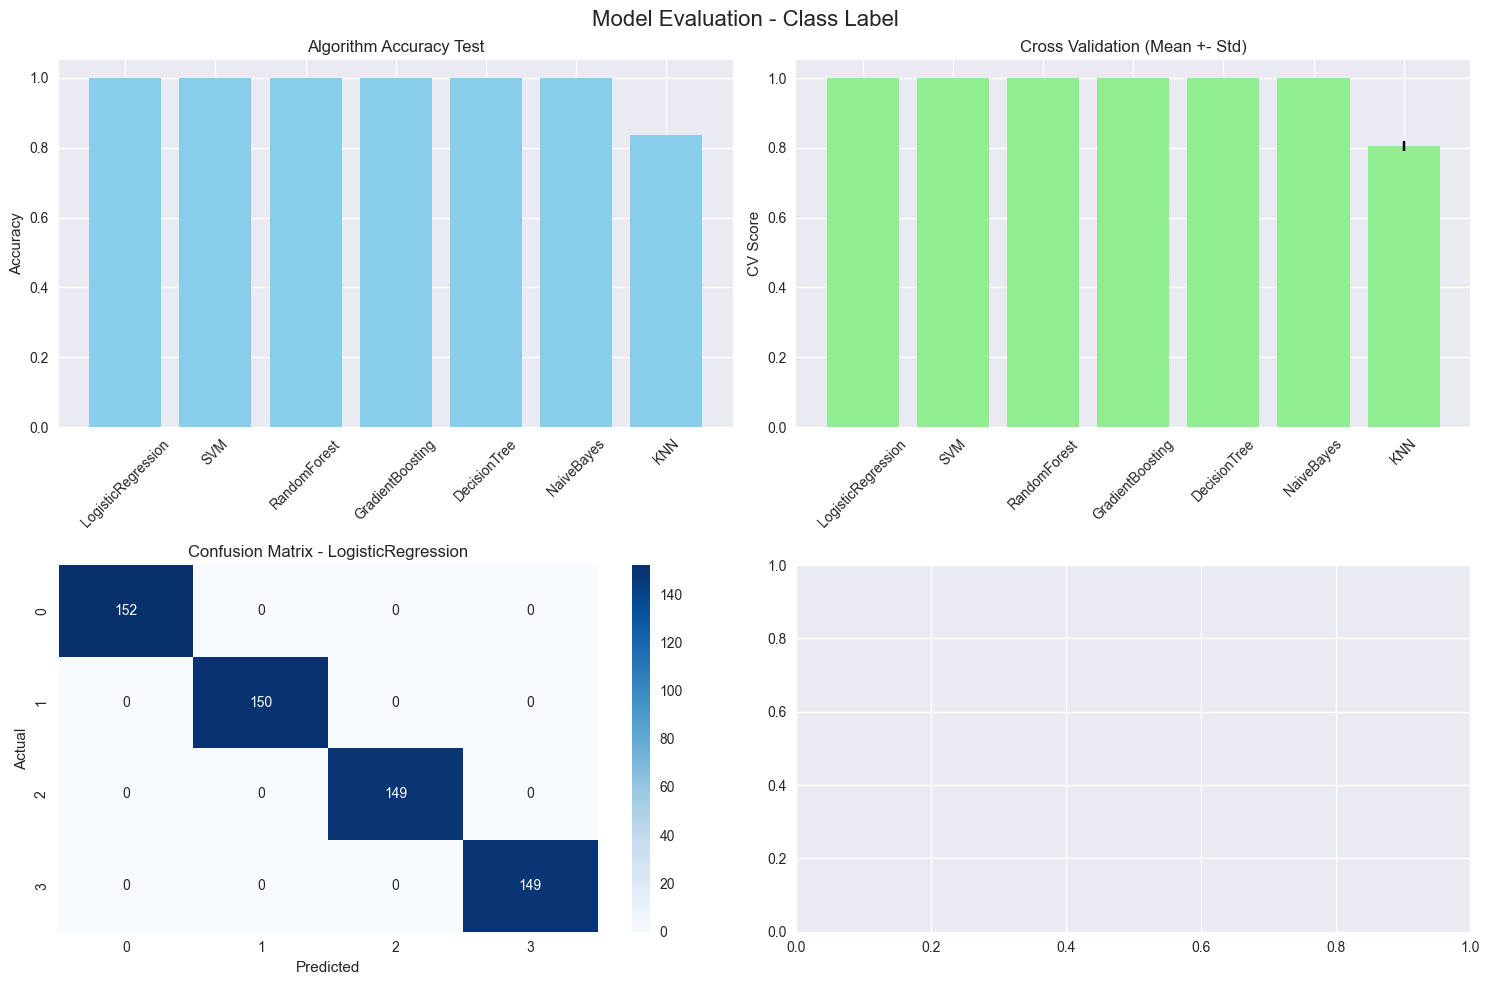

In [33]:
# Preset.
fig, axes = plt.subplots(2,2,figsize=(15,10))
fig.suptitle(f'Model Evaluation - Class Label', fontsize=16)

# 1. Accuracy comparison.
axes[0,0].bar(results_df['Algorithm'], results_df['Test_Accuracy'], color='skyblue')
axes[0,0].set_title('Algorithm Accuracy Test')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. CV Score comparison.
axes[0, 1].bar(results_df['Algorithm'], results_df['CV_Mean'], yerr=results_df['CV_Std'], color='lightgreen', capsize=5)
axes[0, 1].set_title('Cross Validation (Mean +- Std)')
axes[0, 1].set_ylabel('CV Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Confusion Matrix del mejor modelo
best_algorithm = results_df.iloc[0]['Algorithm']
best_predictions = results_c[best_algorithm]['predictions']
best_actual = results_c[best_algorithm]['actual']

cm = confusion_matrix(best_actual, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title(f'Confusion Matrix - {best_algorithm}')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')


plt.tight_layout()
plt.show()

Nearly perfect results. KNN shows worst results but every other algorithm displays 100% on the accuracy.

## Disease Risk Model Training

In [34]:
# Dividing data between training and test.
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(X_scaled, y_disease, test_size=0.2, stratify=y_disease)
results_d = {}
models_d = {}

In [36]:
# Algrithm train.
for name, algorithm in algorithms.items():
    print(f'Training {name}...')
    # Cross validation.
    cv_scores = cross_val_score(algorithm, X_train_D, y_train_D, cv=5, scoring='accuracy')
    # Model training
    algorithm.fit(X_train_D, y_train_D)
    # Predictions.
    y_pred = algorithm.predict(X_test_D)
    # Metrics.
    accuracy = accuracy_score(y_test_D, y_pred)
    # Checking binary classification for AUC.
    if len(np.unique(y_disease)) == 2:
        y_pred_proba = algorithm.predict_proba(X_test_D)[:, 1]
        auc = roc_auc_score(y_test_D, y_pred_proba)
    else:
        auc = None 
    
    # Results.
    results_d[name] = {
        'cv_mean' : cv_scores.mean(),
        'cv_std' : cv_scores.std(),
        'accuracy' : accuracy,
        'auc' : auc,
        'predictions': y_pred,
        'actual' : y_test_D
    }
    
    # Models.
    models_d[name] = algorithm

print(f'All models have trained successfully!')

Training LogisticRegression...
Training SVM...
Training RandomForest...
Training GradientBoosting...
Training KNN...
Training DecisionTree...
Training NaiveBayes...
All models have trained successfully!


### Evaluating Disease Risk Model

In [37]:
print(f'Evaluating models for Risk Disease...')

# Creating results datafame.
results_df = pd.DataFrame({
    'Algorithm': list(results_d.keys()),
    'CV_Mean': [results_d[alg]['cv_mean'] for alg in results_d.keys()],
    'CV_Std' : [results_d[alg]['cv_std'] for alg in results_d.keys()],
    'Test_Accuracy' : [results_d[alg]['accuracy'] for alg in results_d.keys()],
    'AUC': [results_d[alg]['auc'] for alg in results_d.keys()]
})

results_df = results_df.sort_values('Test_Accuracy', ascending=False)
print(f'\n Algorithmm Ranking for Disease Risk:')
print(results_df)

Evaluating models for Risk Disease...

 Algorithmm Ranking for Disease Risk:
            Algorithm  CV_Mean    CV_Std  Test_Accuracy   AUC
0  LogisticRegression  1.00000  0.000000       1.000000  None
1                 SVM  1.00000  0.000000       1.000000  None
2        RandomForest  1.00000  0.000000       1.000000  None
3    GradientBoosting  1.00000  0.000000       1.000000  None
5        DecisionTree  1.00000  0.000000       1.000000  None
6          NaiveBayes  1.00000  0.000000       1.000000  None
4                 KNN  0.95875  0.013591       0.971667  None


Same perfect results. This model also improves the KNN algorithm.

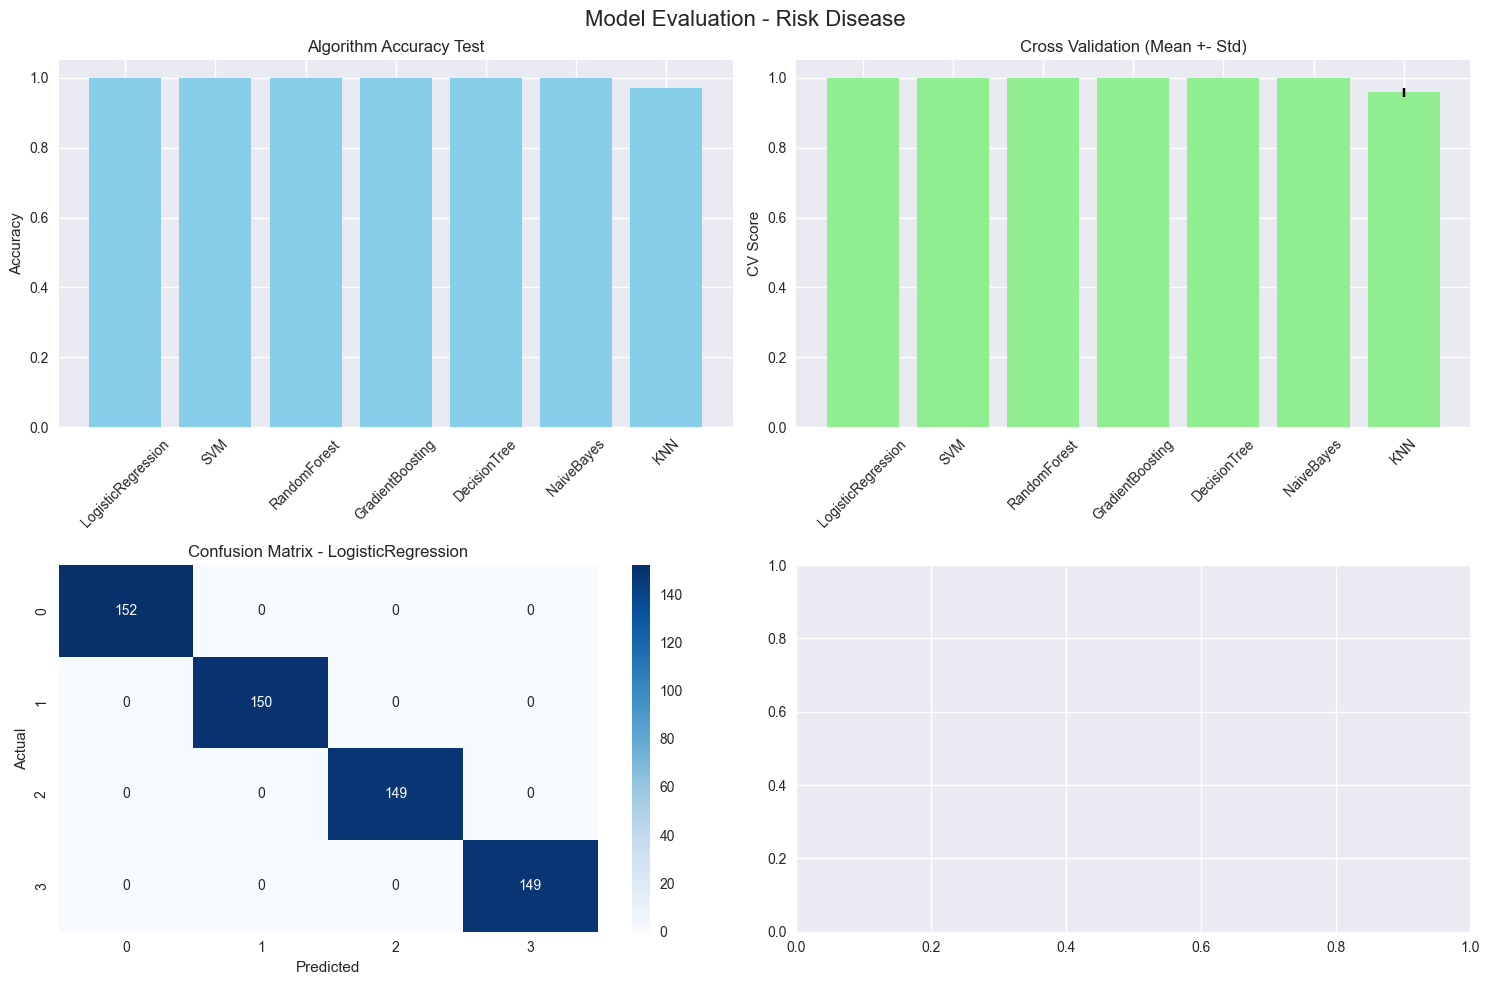

In [39]:
# Preset.
fig, axes = plt.subplots(2,2,figsize=(15,10))
fig.suptitle(f'Model Evaluation - Risk Disease', fontsize=16)

# 1. Accuracy comparison.
axes[0,0].bar(results_df['Algorithm'], results_df['Test_Accuracy'], color='skyblue')
axes[0,0].set_title('Algorithm Accuracy Test')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. CV Score comparison.
axes[0, 1].bar(results_df['Algorithm'], results_df['CV_Mean'], yerr=results_df['CV_Std'], color='lightgreen', capsize=5)
axes[0, 1].set_title('Cross Validation (Mean +- Std)')
axes[0, 1].set_ylabel('CV Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Confusion Matrix del mejor modelo
best_algorithm = results_df.iloc[0]['Algorithm']
best_predictions = results_c[best_algorithm]['predictions']
best_actual = results_c[best_algorithm]['actual']

cm = confusion_matrix(best_actual, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title(f'Confusion Matrix - {best_algorithm}')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

        
plt.tight_layout()
plt.show()

This is a very interesting topic, although these data are synthetic and no real conclusions can be drawn from them.